### Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Signal

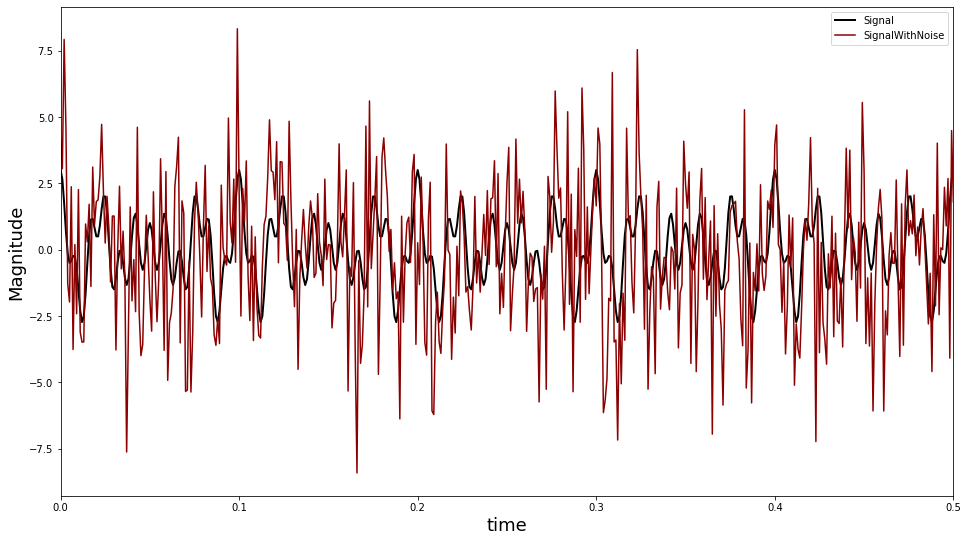

In [2]:
dt=0.001
t=np.arange(0, 1.5, dt)
signal=np.cos(2*np.pi*50*t)+np.cos(2*np.pi*120*t)+np.cos(np.pi*80*t)
noise=np.random.randn(len(t))
SignalWithNoise=2.5*noise+signal
fig, ax=plt.subplots(figsize=(16, 9))
ax.plot(t, signal, color="black", label="Signal", linewidth=2)
ax.plot(t, SignalWithNoise, color="DarkRed", label="SignalWithNoise")
ax.set_xlabel("time", fontsize=18)
ax.set_ylabel("Magnitude", fontsize=18)
ax.set_xlim(0, 0.5)
plt.legend()

### Fast Fourier Transform

c:\users\hp-npc\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


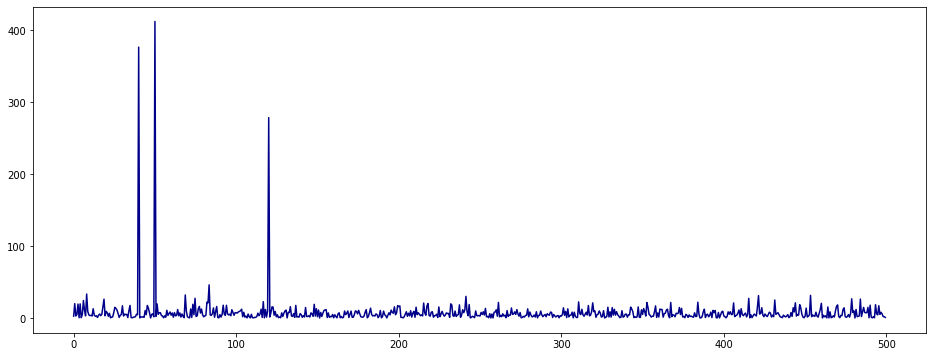

In [3]:
n=len(t)
f_hat=np.fft.fft(SignalWithNoise, n)
frequency=(1/(dt*n))*np.arange(0, n)
PSD=f_hat*np.conjugate(f_hat)/n
half_len=np.arange(0, np.floor(n/2), dtype="int")
fig, ax=plt.subplots(figsize=(16, 6))
ax.plot(frequency[half_len], PSD[half_len], color="DarkBlue")

### Recovered Signal

c:\users\hp-npc\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\hp-npc\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


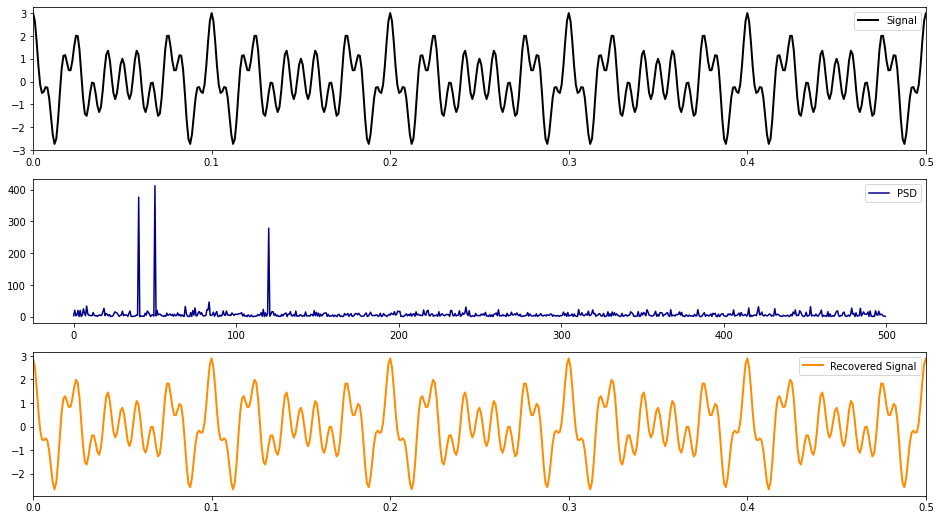

In [4]:
filt=PSD>100
PSDrecovery=PSD*filt
fhat=f_hat*filt
RecoveredSignal=np.fft.ifft(fhat)
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(16, 9))
ax[0].plot(t, signal, color="black", label="Signal", linewidth=2)
#ax[0].plot(t, SignalWithNoise, color="DarkRed", label="SignalWithNoise")
ax[0].set_xlim(0, 0.5)
ax[0].legend()

ax[1].plot(frequency[half_len], PSD[half_len], color="DarkBlue", label="PSD")
ax[1].legend()

ax[2].plot(t, RecoveredSignal, color="DarkOrange", label="Recovered Signal", linewidth=2)
ax[2].set_xlim(0, 0.5)
ax[2].legend()

In [5]:
np.sum(signal==RecoveredSignal)

0